# Intensity-Level Slicing

First, let's import the libraries we will use.

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
image= cv2.imread("aortic_angiogram.jpg")

We rewrote the scaling function we used in our previous work and the stack function we used to see the photos side by side.

In [29]:
def normalization(image):
    s= image.astype(float)
    s-=np.min(s)
    s/=np.max(s)
    return (s*255).astype(np.uint8)

In [30]:
def stack(*args):
    return np.hstack(args)

Since we will have only two density values at the output, we called the function binary slicing function.If the pixel values in the photograph placed in this function are between A and B values, I will change it with the upper value, if it is not in this range, I will change it with the lower value.In the numpy library, the full like method creates an array of the same length as our photo and fills it with the value we want, namely our lower limit value.With np.logical_and we find our density values greater than A and less than B.

In [34]:
def binary_slicing(image, A, B, upper_value, Lower_value):
    image_out= np.full_like(image, lower_value)
    index_value= np.logical_and(image>A,  image<B)
    image_out[index_value]= upper_value
    return image_out

In [35]:
def linear_slicing(image,A,B,value):
    image_out  = image.copy()
    index=np.logical_and(image>A,  image<B)
    image_out[index]= value
    return image_out

In [36]:
A=150
B=200
lower_value=10
upper_value=255

binary_image= binary_slicing(image,A,B,upper_value,lower_value)
linear_image= linear_slicing(image,A,B,upper_value)
side_by_side= stack(image,binary_image,linear_image)



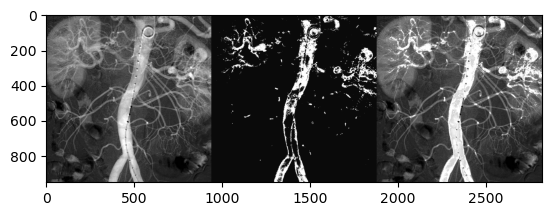

In [37]:
plt.imshow(side_by_side, cmap="gray")
plt.show()